In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20, 10

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))

df = pd.read_csv('KOSPI_국면분석.csv')
df.head()

,날짜,Y,지수시가,지수고가,지수저가,지수종가,거래량,거래대금,상장주식수,시가총액,...,보합종목수,상한종목수,하한종목수,연중최고가종목수,연중최저가종목수,25일이평상회종목건수,25일이평하회종목건수,52주신고가종목수,52주신저가종목수,배당 수익율
0,1/2/01,상승,503.31,521.34,500.97,520.95,231014600,1223328,19638887,191252891,...,22,167,16,0,0,26,73,1,85,0.0
1,1/3/01,상승,512.74,524.58,510.70,521.43,324584400,1583403,19633559,191363161,...,52,85,6,0,0,28,71,1,12,0.0
2,1/4/01,상승,551.53,567.16,550.91,558.02,444540900,2984761,19634734,204074166,...,20,149,3,0,0,42,57,1,2,0.0
3,1/5/01,상승,559.54,581.41,555.40,580.85,578286000,3569582,19637038,212089180,...,37,92,9,0,0,43,56,3,2,0.0
4,1/8/01,상승,573.72,587.91,572.48,586.65,558645100,2948092,19630735,214231273,...,45,72,5,0,0,43,56,6,1,0.0


/Users/katekim/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


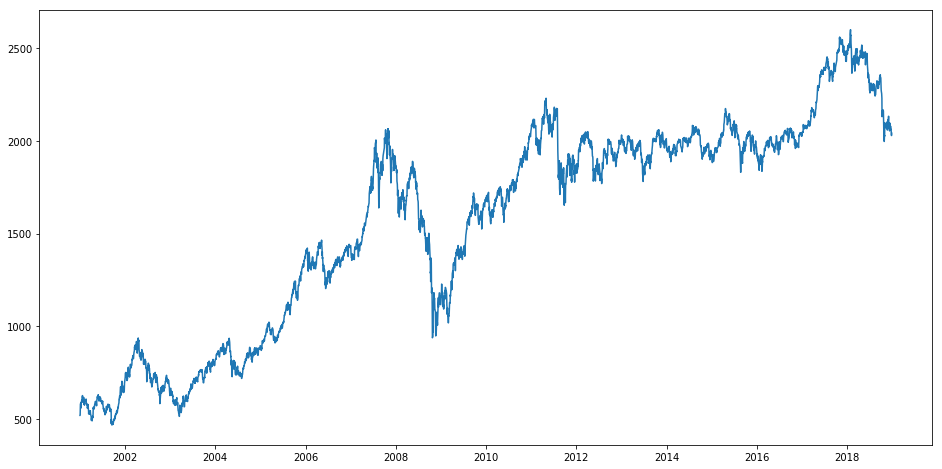

In [2]:
df['날짜'] = pd.to_datetime(df['날짜'])
df.index = df['날짜']

plt.figure(figsize = (16, 8))
plt.plot(df['지수종가'], label = '지수종가 History')

In [3]:
# Creating dataframe with date and the target variable
data = df.sort_index(ascending = True, axis = 0)
new_data = pd.DataFrame(index = range(0, len(df)), columns = ['날짜', '지수종가'])

for i in range(0, len(data)):
    new_data['날짜'][i] = data['날짜'][i]
    new_data['지수종가'][i] = data['지수종가'][i]

In [4]:
# Splitting into Train and Validation
train = new_data[:4205]
valid = new_data[4205:]

In [5]:
# Shapes of Traning and Validation set
print('\n Shape of training set:')
print(train.shape)

print('\n Shape of validation set:')
print(valid.shape)


 Shape of training set:
(4205, 2)

 Shape of validation set:
(244, 2)


In [6]:
# Making Predictions
pred = []
for i in range(0, valid.shape[0]):
    a = train['지수종가'][len(train) - 244 + i].sum() + sum(pred)
    b = a / 244
    pred.append(b)

In [7]:
# Cheking the results (RMSE value)
rms = np.sqrt(np.mean(np.power(np.array(valid['지수종가'] - pred), 2)))
print('\n RMSE value on validation set:')
print(rms)


 RMSE value on validation set:
2314.6328830224916


/Users/katekim/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/katekim/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


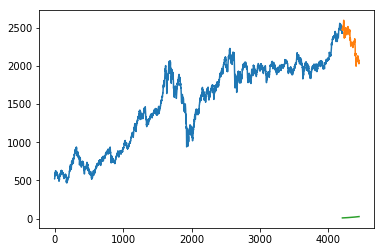

In [8]:
valid['Predictions'] = 0
valid['Predictions'] = pred
plt.plot(train['지수종가'])
plt.plot(valid[['지수종가', 'Predictions']])